                  name         name_ar            name_ber  \
0                Adrar           أدرار               ⴰⴷⵔⴰⵔ   
1            Timimoune         تيميمون            ⵜⵉⵎⵉⵎⵓⵏ    
2  Bordj Badji Mokhtar  برج باجي مختار   ⴱⵓⵔⴵ ⴱⴰⴵⵉ ⵎⵓⵅⵜⴰⵔ    
3           In Guezzam        عين قزام           ⵉⵏ ⴳⴻⵣⴰⵎ    
4          Tamanrasset         تمنراست           ⵜⴰⵎⴰⵏⵖⴰⵙⵜ   

               density city_code  \
0  0.93999999999999995        01   
1                           None   
2                 None      None   
3                 None      None   
4  0.32000000000000001        11   

                                            geometry  
0  POLYGON ((-5.66826 25.51348, -5.66762 25.51310...  
1  POLYGON ((-0.92035 28.98090, -0.91677 28.97888...  
2  POLYGON ((-4.83333 25.00000, -4.83188 24.99906...  
3  POLYGON ((1.77632 21.80797, 1.77863 21.80400, ...  
4  POLYGON ((1.41672 21.80371, 1.41817 21.80399, ...  


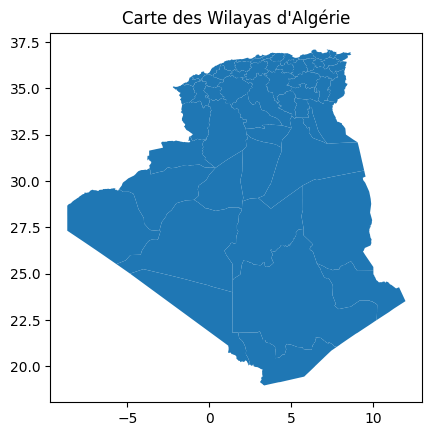

Colonnes disponibles : Index(['name', 'name_ar', 'name_ber', 'density', 'city_code', 'geometry'], dtype='object')


In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Téléchargez l'ensemble des données des wilayas d'Algérie au format Geojson
url = "/content/all-wilayas.geojson"
algeria_wilayas = gpd.read_file(url)

# Afficher le contenu du fichier
print(algeria_wilayas.head())

# Afficher la carte
algeria_wilayas.plot()
plt.title("Carte des Wilayas d'Algérie")
plt.show()

# Afficher les colonnes avec le nom en latin, arabe et berbère
print("Colonnes disponibles :", algeria_wilayas.columns)


Description du fichier Bejaia :
<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 0 entries
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   name       0 non-null      object  
 1   name_ar    0 non-null      object  
 2   name_ber   0 non-null      object  
 3   density    0 non-null      object  
 4   city_code  0 non-null      object  
 5   geometry   0 non-null      geometry
dtypes: geometry(1), object(5)
memory usage: 0.0+ bytes
None
       name name_ar name_ber density city_code geometry
count     0       0        0       0         0        0
unique    0       0        0       0         0        0
top     NaN     NaN      NaN     NaN       NaN      NaN
freq    NaN     NaN      NaN     NaN       NaN      NaN


<ipython-input-18-0e9dccc37101>:23: FutureWarning: plot_polygon_collection is intended for internal use only, and will be deprecated.
  gpd.plotting.plot_polygon_collection(ax=ax, geoms=bejaia_wilaya['geometry'], color='blue', edgecolor='black')


IndexError: single positional indexer is out-of-bounds

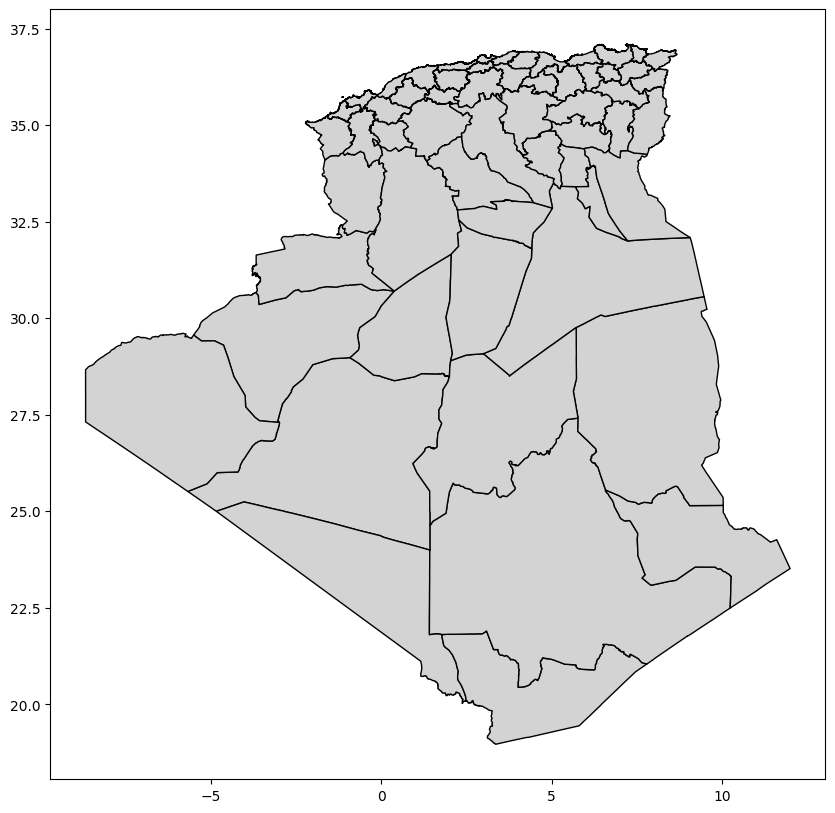

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Télécharger l'ensemble des données des wilayas d'Algérie au format Geojson
url = "https://github.com/fr33dz/Algeria-geojson/raw/main/algeria-wilayas.geojson"
algeria_wilayas = gpd.read_file(url)

# Sélectionner la wilaya de Béjaïa
bejaia_wilaya = algeria_wilayas[algeria_wilayas['name'] == 'Bejaia']

# Afficher la description du fichier Bejaia
print("Description du fichier Bejaia :")
print(bejaia_wilaya.info())
print(bejaia_wilaya.describe())

# Créer une carte des wilayas avec Béjaïa en couleur différente
fig, ax = plt.subplots(figsize=(10, 10))

# Afficher les wilayas d'Algérie en gris
algeria_wilayas.plot(ax=ax, color='lightgray', edgecolor='black')

# Afficher la wilaya de Béjaïa en couleur différente
gpd.plotting.plot_polygon_collection(ax=ax, geoms=bejaia_wilaya['geometry'], color='blue', edgecolor='black')

# Ajouter un rectangle autour de Béjaïa
rect = plt.Rectangle((bejaia_wilaya.bounds.minx.iloc[0], bejaia_wilaya.bounds.miny.iloc[0]),
                     bejaia_wilaya.bounds.maxx.iloc[0] - bejaia_wilaya.bounds.minx.iloc[0],
                     bejaia_wilaya.bounds.maxy.iloc[0] - bejaia_wilaya.bounds.miny.iloc[0],
                     linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(rect)

plt.title("Carte des Wilayas d'Algérie avec Béjaïa en couleur différente")
plt.show()

# Sauvegarder la carte de Bejaia au format .shp
output_shapefile = "bejaia_wilaya.shp"
bejaia_wilaya.to_file(output_shapefile)


In [13]:
import folium

# Créer une carte centrée sur Béjaïa
map_bejaia = folium.Map(location=[bejaia_wilaya.geometry.centroid.y.values[0],
                                  bejaia_wilaya.geometry.centroid.x.values[0]],
                       zoom_start=10)

# Ajouter la couche GeoPandas à la carte
folium.GeoJson(bejaia_wilaya).add_to(map_bejaia)

# Afficher la carte avec Folium
map_bejaia.save("carte_bejaia_folium.html")


<ipython-input-13-d5bbd499a7f8>:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_bejaia = folium.Map(location=[bejaia_wilaya.geometry.centroid.y.values[0],


IndexError: index 0 is out of bounds for axis 0 with size 0